In [1]:
import torch
from torch import optim, nn
from torch.functional import F
from torch.utils.data import TensorDataset, DataLoader

In [2]:
from sklearn.datasets import load_digits
data = load_digits()
x, y = data.data, data.target
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

In [3]:
ds = TensorDataset(x, y)
loader = DataLoader(ds, batch_size=128, shuffle=True)

In [4]:
class CustomLayer(nn.Module):
    def __init__(self, n_in, n_out):
        super().__init__()
        self.ln1 = nn.Linear(n_in, n_out)
    
    def forward(self, x):
        x = self.ln1(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.3)
        
        return x

In [5]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.ln1 = CustomLayer(64, 32)
        self.ln2 = CustomLayer(32, 16)
        self.ln3 = nn.Linear(16, 10)
        
    def forward(self, x):
        x = self.ln1(x)
        x = self.ln2(x)
        x = self.ln3(x)
        x = F.softmax(x, dim=1)
        return x

In [6]:
net = NN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [7]:
losses = []
for e in range(100):
    step_loss = 0
    for xx, yy in loader:
        optimizer.zero_grad()
        
        y_pred = net(xx)
        loss = loss_fn(y_pred, yy)
        loss.backward()
        optimizer.step()
        
        step_loss += loss.item()
        
    losses.append(step_loss)

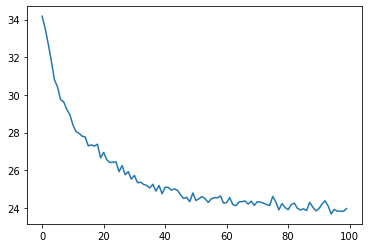

In [8]:
import matplotlib.pyplot as plt
plt.plot(losses)